In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

matplotlib.rc('font', family = 'Malgun Gothic')

In [2]:
df_rallit = pd.read_csv("data/data_rallit_20250417.csv")
df_wanted = pd.read_csv("data/data_wanted_20250416.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_rallit_20250417.csv'

In [ ]:
#df_wanted에서 position에 해당하는 키값에 따라 새로운 dataframe으로 분류류
back_key = ['백엔드','백 엔드','back-end', 'back end', 'backend']
front_key = ['프론트엔드', '프론트 엔드','front-end', 'front end', 'frontend']
full_key = ['풀스택','풀 스택', 'full stack', 'fullstack']

def contains_keyword(text, keywords):
    text = str(text).lower()
    return any(kw.lower() in text for kw in keywords)

df_wanted_back = df_wanted[df_wanted['position'].apply(lambda x: contains_keyword(x, back_key))].copy()
df_wanted_front = df_wanted[df_wanted['position'].apply(lambda x: contains_keyword(x, front_key))].copy()
df_wanted_full  = df_wanted[df_wanted['position'].apply(lambda x: contains_keyword(x, full_key))].copy()

print(len(df_wanted),len(df_wanted_back),len(df_wanted_front),len(df_wanted_full))

1000 225 139 26


In [ ]:
def draw_bar(data, df_name):
    figure, ax = plt.subplots()
    figure.set_size_inches(18,10)

    #위에 만든 df의 column 하나씩 그래프로 그리기
    colors = sns.color_palette("hls", len(data.index))
    ax = sns.barplot(x = data.values, y = data.index, hue = data.index, palette = colors, ax = ax, )
    ax.set_title(df_name, fontsize=20)
    ax.set_ylabel('')
    ax.legend(data.index, ncol=2, loc='lower right', labelcolor=colors, fontsize=14)

    #각 bar 위에 해당하는 숫자를 넣기기
    max_value = max(data.values)
    for j, (x_val, y_val) in enumerate(zip(data.index, data.values)):
        ax.text(x = y_val + max_value*0.02, y = j, s = f'{y_val:.0f}', ha = 'center', va = 'center', fontsize = 12, color = colors[j])
    plt.show()

In [ ]:
def autopct_func(pct):
    return ('%.1f%%' % pct) if pct > 1 else ''

def draw_circle(data, df_name):
    figure, ax = plt.subplots()
    figure.set_size_inches(20,10)

    colors = sns.color_palette("hls", len(data.index))

    # 원형 그래프 그리기 autopct=비율 표시, pctdistance=중앙으로부터 pct거리, startangle=시작 각도
    ax.pie(data.values, colors=colors, autopct=autopct_func, pctdistance=0.8,\
                startangle=90, rotatelabels=True)
    ax.legend(data.index, ncol=2, loc='right', labelcolor=colors, fontsize=14)
    ax.set_title(df_name, fontsize=20, x=0.1, y=0.95)
    ax.axis('equal')  # 원이 찌그러지지 않게 1:1비율 고정정

    plt.show()

In [ ]:
keys = ['AMAZONEC2', 'ANGULAR2', 'AWS', 'C#', 'C++', 'C언어', 
       'CSS3', 'DOCKER', 'EXPRESSJS', 'FLUTTER', 'GIT', 'GRADLE', 'GRAPHQL',
       'HTML5', 'IONIC', 'JAVA', 'JAVASCRIPT', 'KOTLIN', 'MARIADB', 'MSA',
       'MYBATIS', 'MYSQL', 'NEST', 'NEXT', 'NODE', 'PHP', 'PYTHON', 'RDB', 'REACT',
       'RECOIL', 'REDUX', 'RESTAPI', 'RXJS', 'SPRING', 'SQL', 'SWAGGERUI',
       'TYPESCRIPT', 'UBUNTU', 'VUE', 'ZUSTAND']

def data_frac(df, series):
    series = series.rename(index=lambda x: re.sub(r'\bC\s?(?:언어|개발)', 'C언어', x, flags=re.IGNORECASE))

    for keyword in keys:
        count = df['detail'].fillna('').str.contains(re.escape(keyword), flags=re.IGNORECASE).sum()
        series[keyword] += count

    series = series.drop(series[series == 0].index).sort_values(ascending=False)
    return series

In [ ]:
#position을 구분하지 않고 전체 detail데이터에서 키워드 세기
df_wanted_cnt = pd.Series(0, index=keys)
df_wanted_cnt = data_frac(df_wanted,df_wanted_cnt)

#각 position별로 구분하여 detail데이터에서 키워드 세기
df_wanted_back_cnt = pd.Series(0, index=keys)
df_wanted_back_cnt = data_frac(df_wanted_back, df_wanted_back_cnt)

df_wanted_front_cnt = pd.Series(0, index=keys)
df_wanted_front_cnt = data_frac(df_wanted_front, df_wanted_front_cnt)

df_wanted_full_cnt = pd.Series(0, index=keys)
df_wanted_full_cnt = data_frac(df_wanted_full, df_wanted_full_cnt)

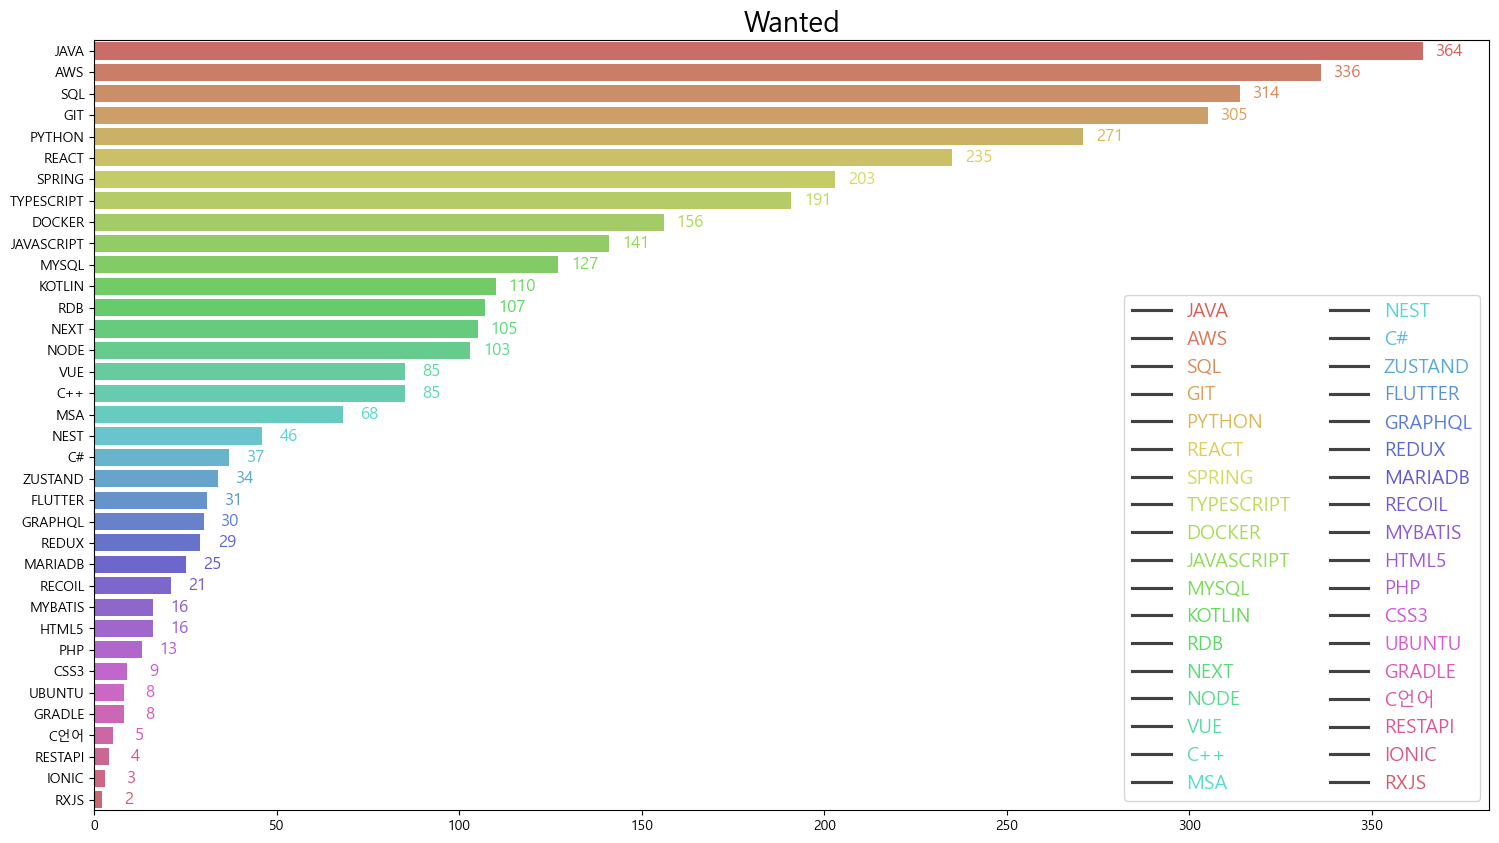

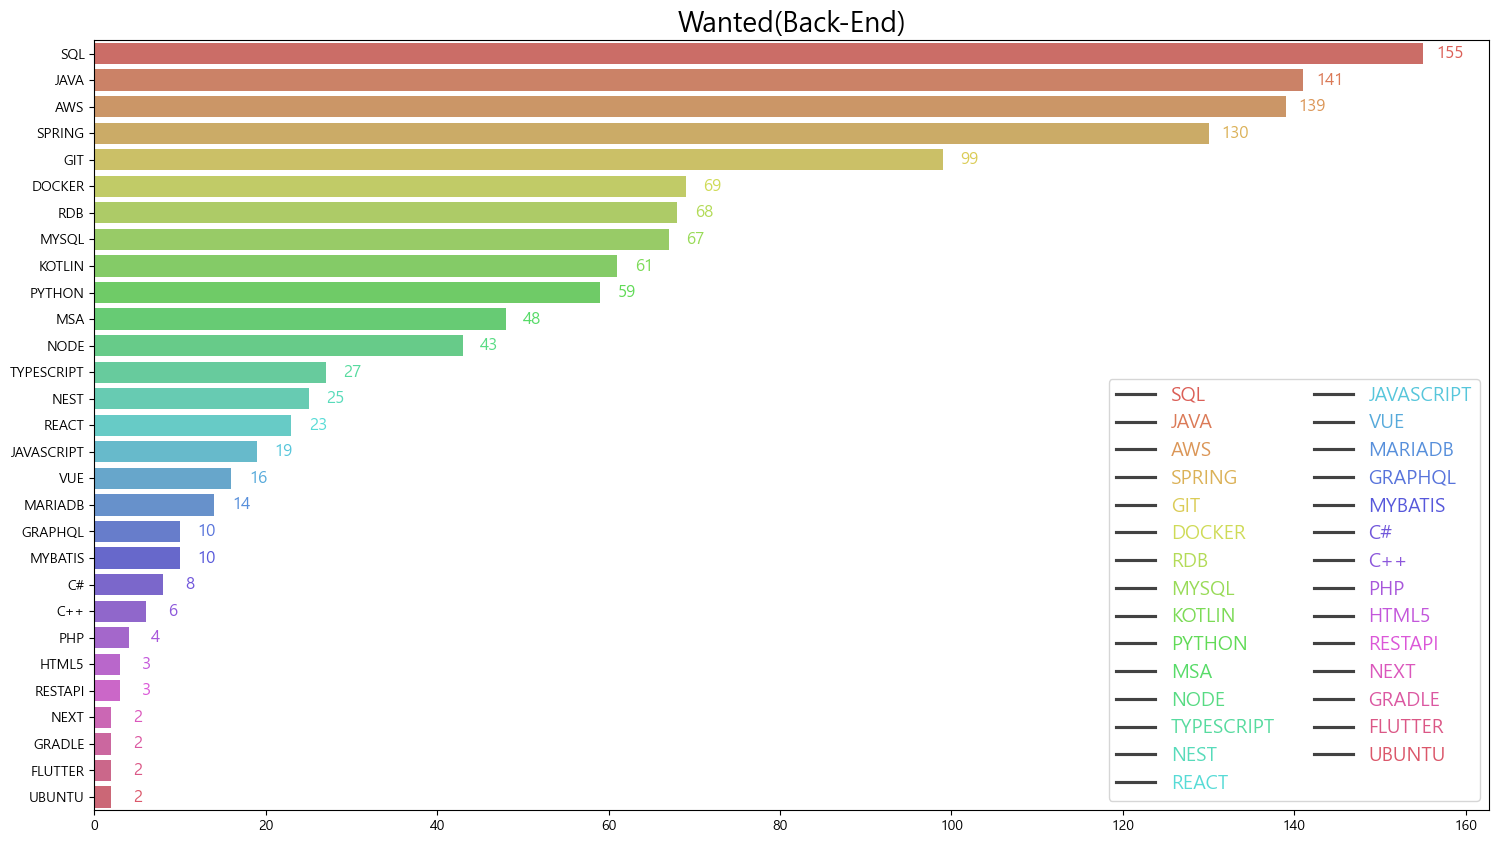

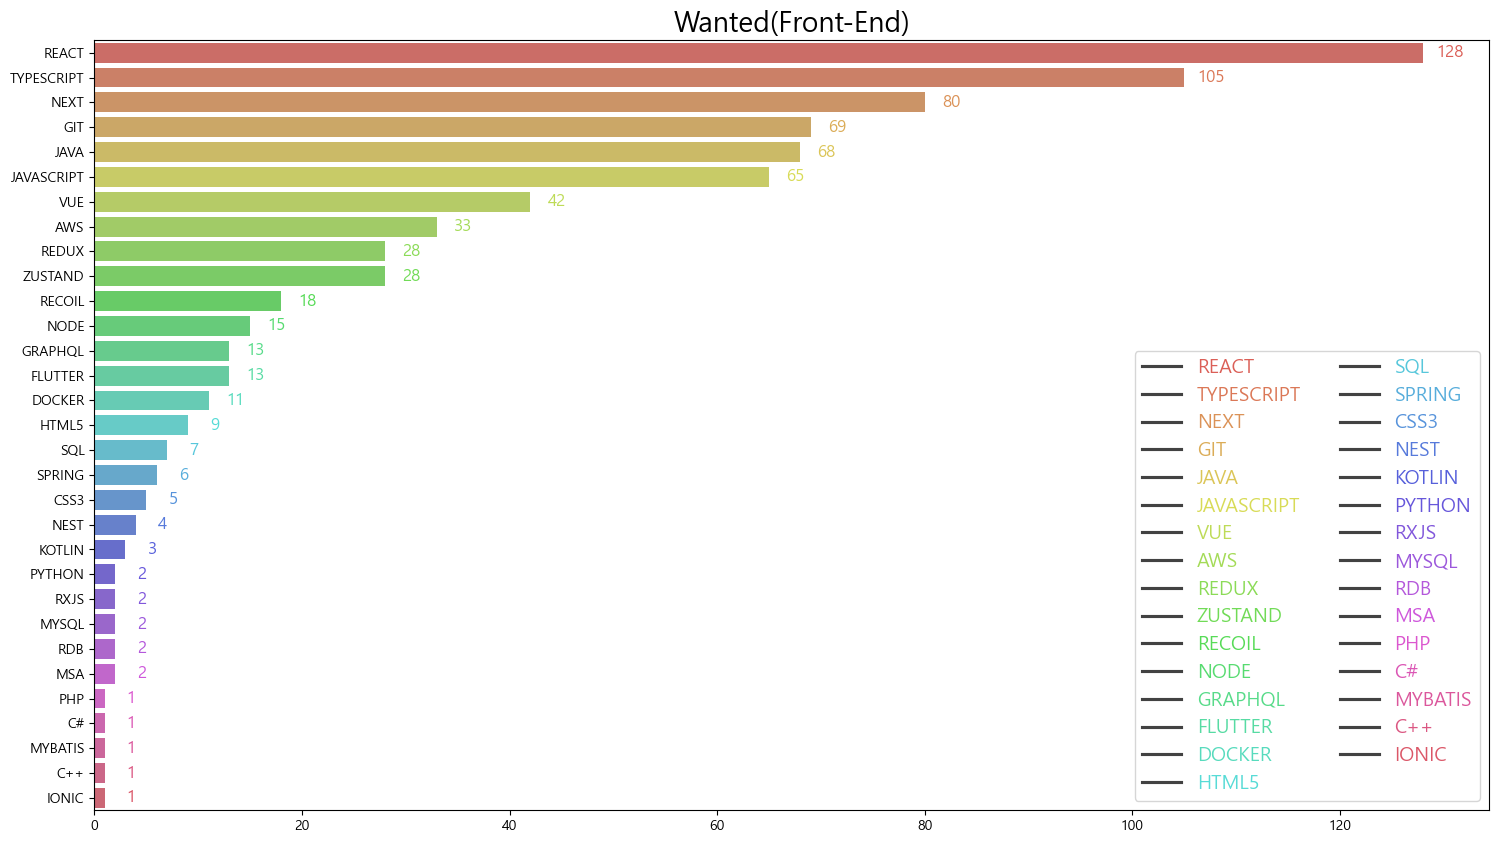

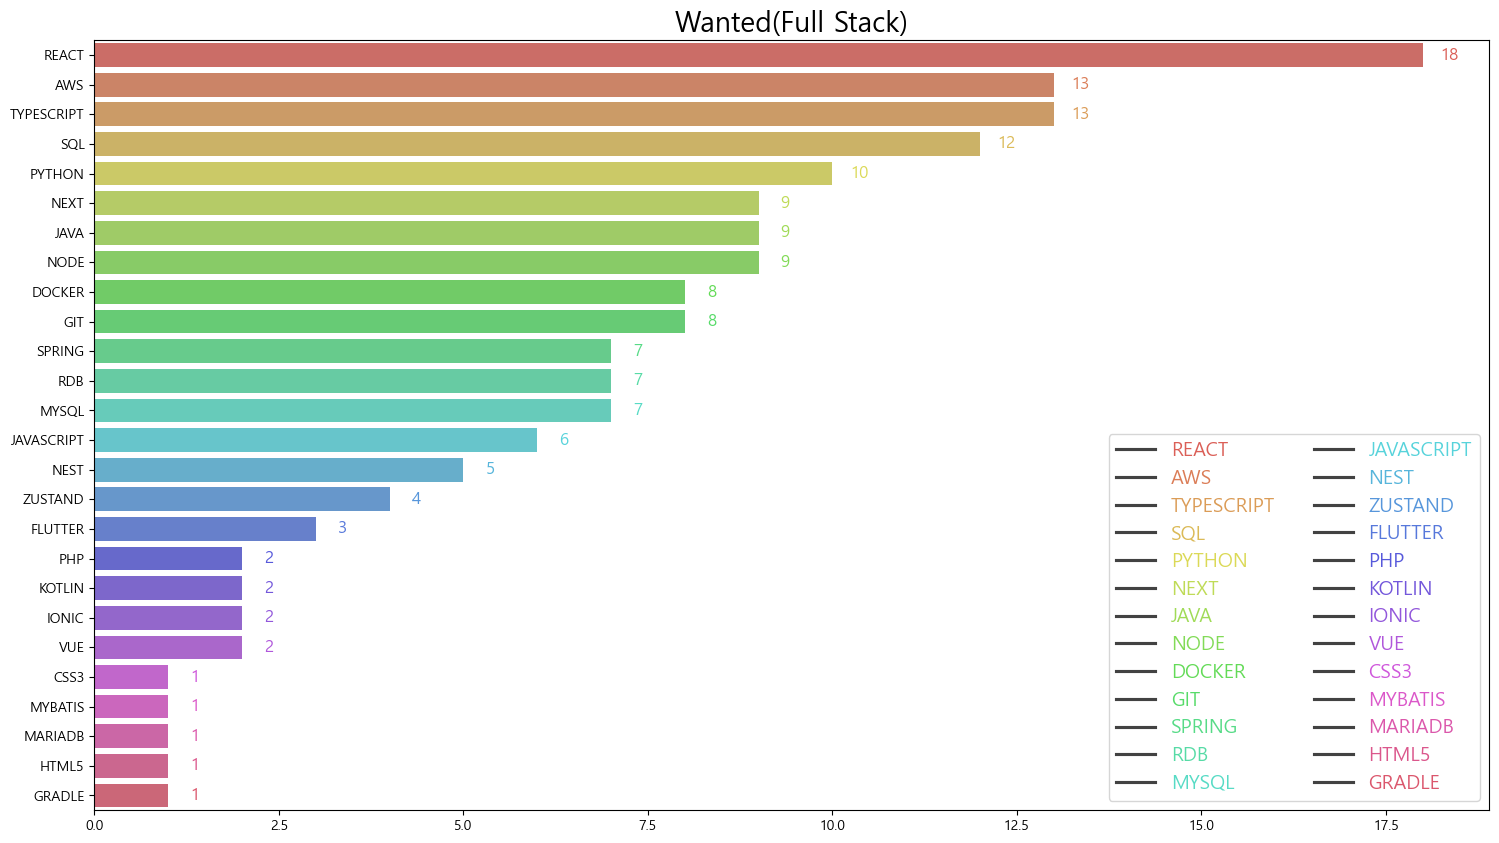

In [ ]:
draw_bar(df_wanted_cnt, 'Wanted')
draw_bar(df_wanted_back_cnt, 'Wanted(Back-End)')
draw_bar(df_wanted_front_cnt, 'Wanted(Front-End)')
draw_bar(df_wanted_full_cnt, 'Wanted(Full Stack)')

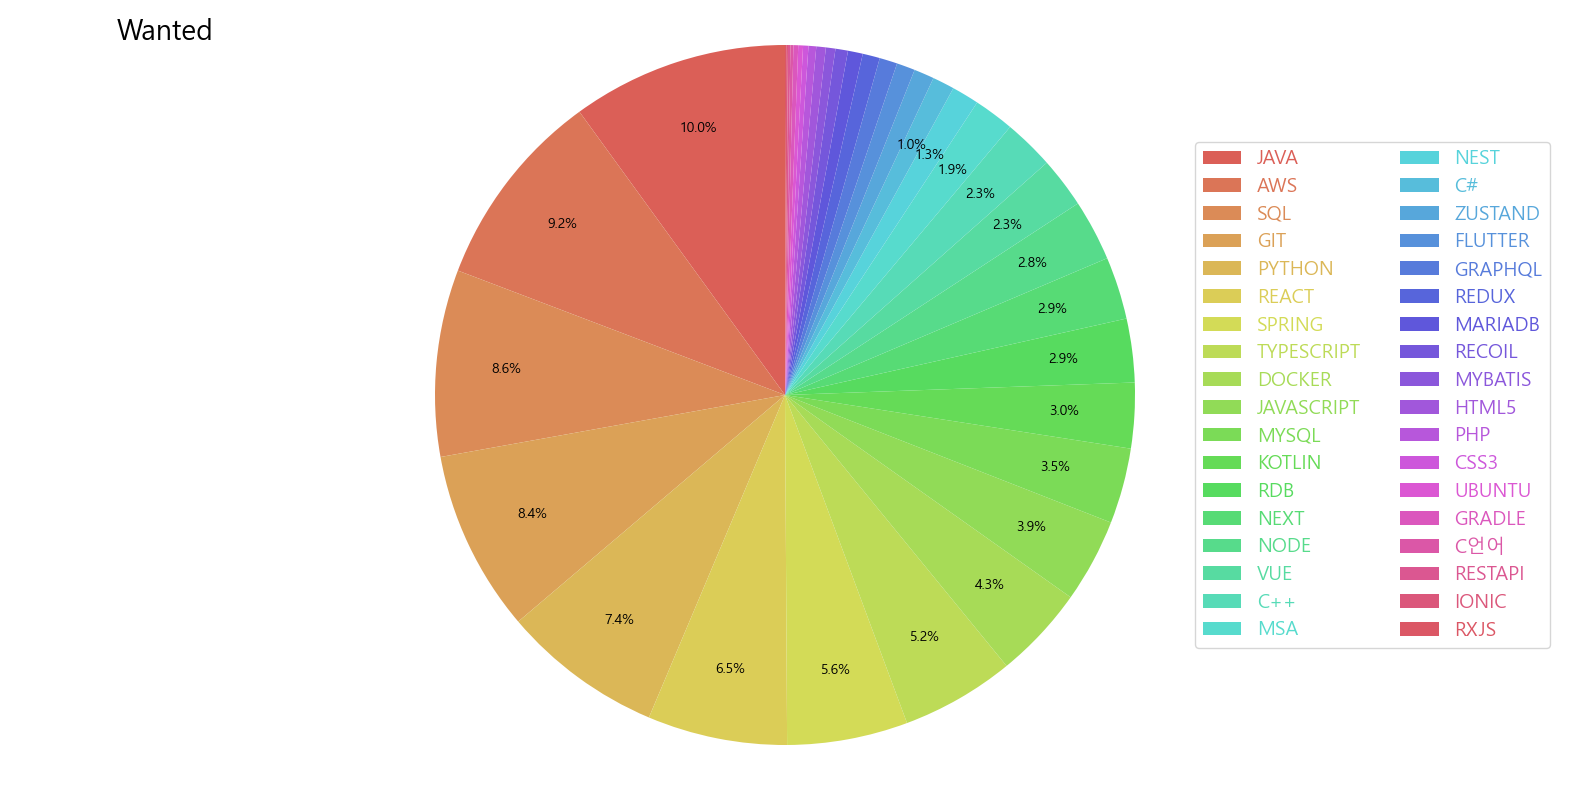

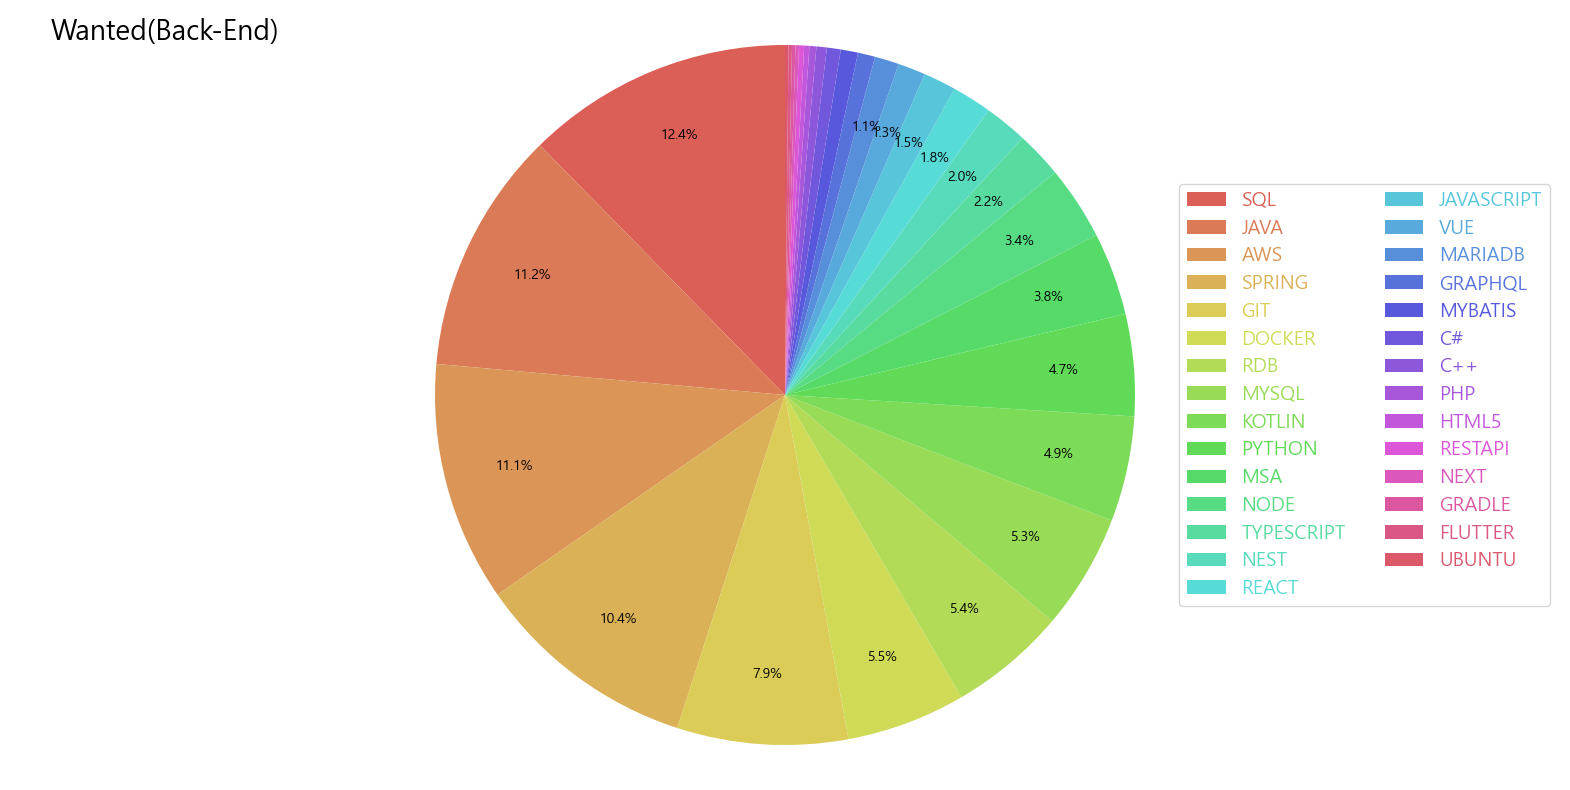

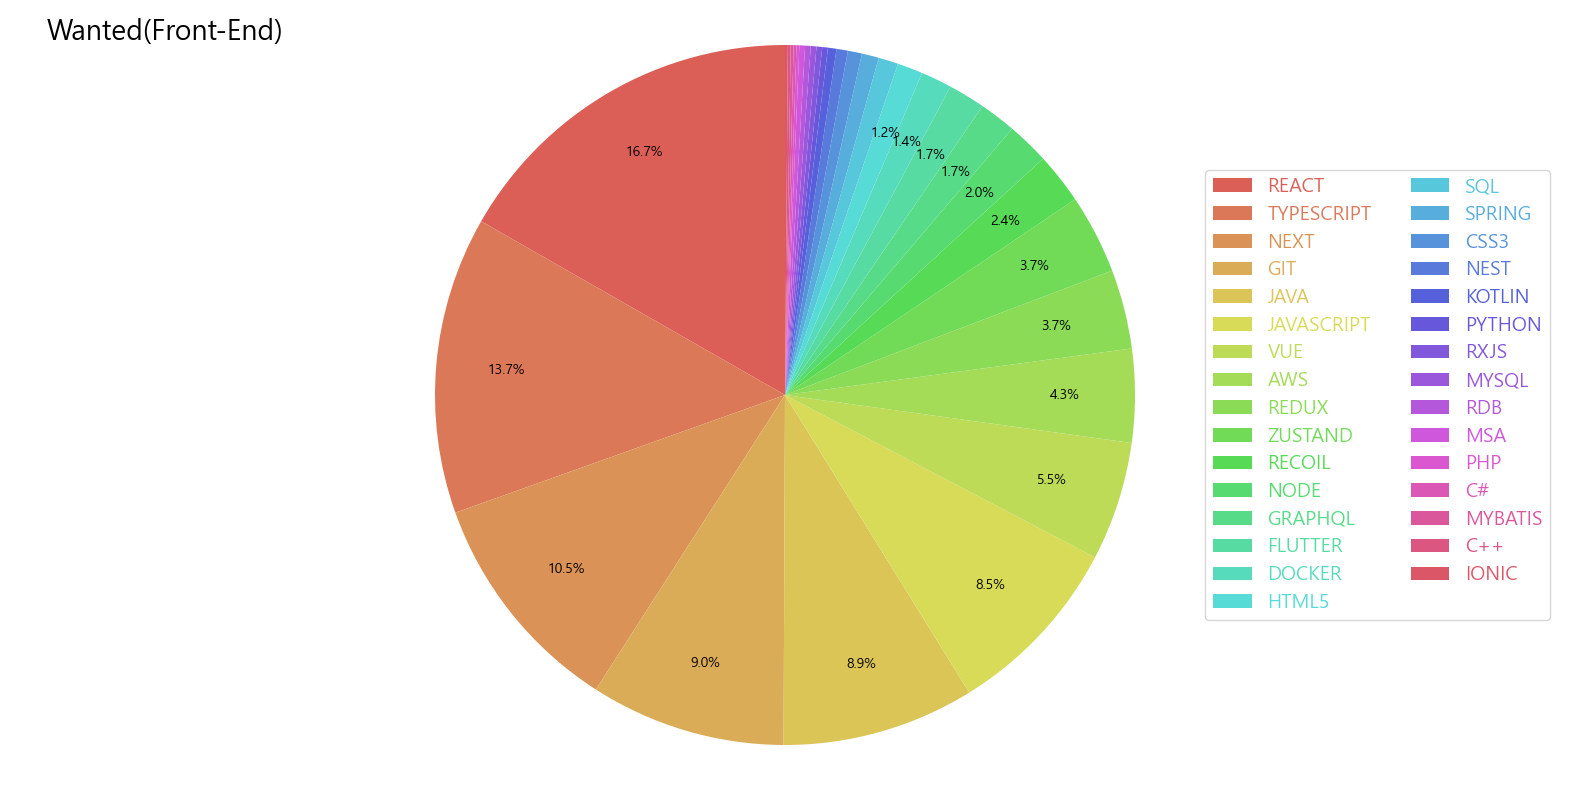

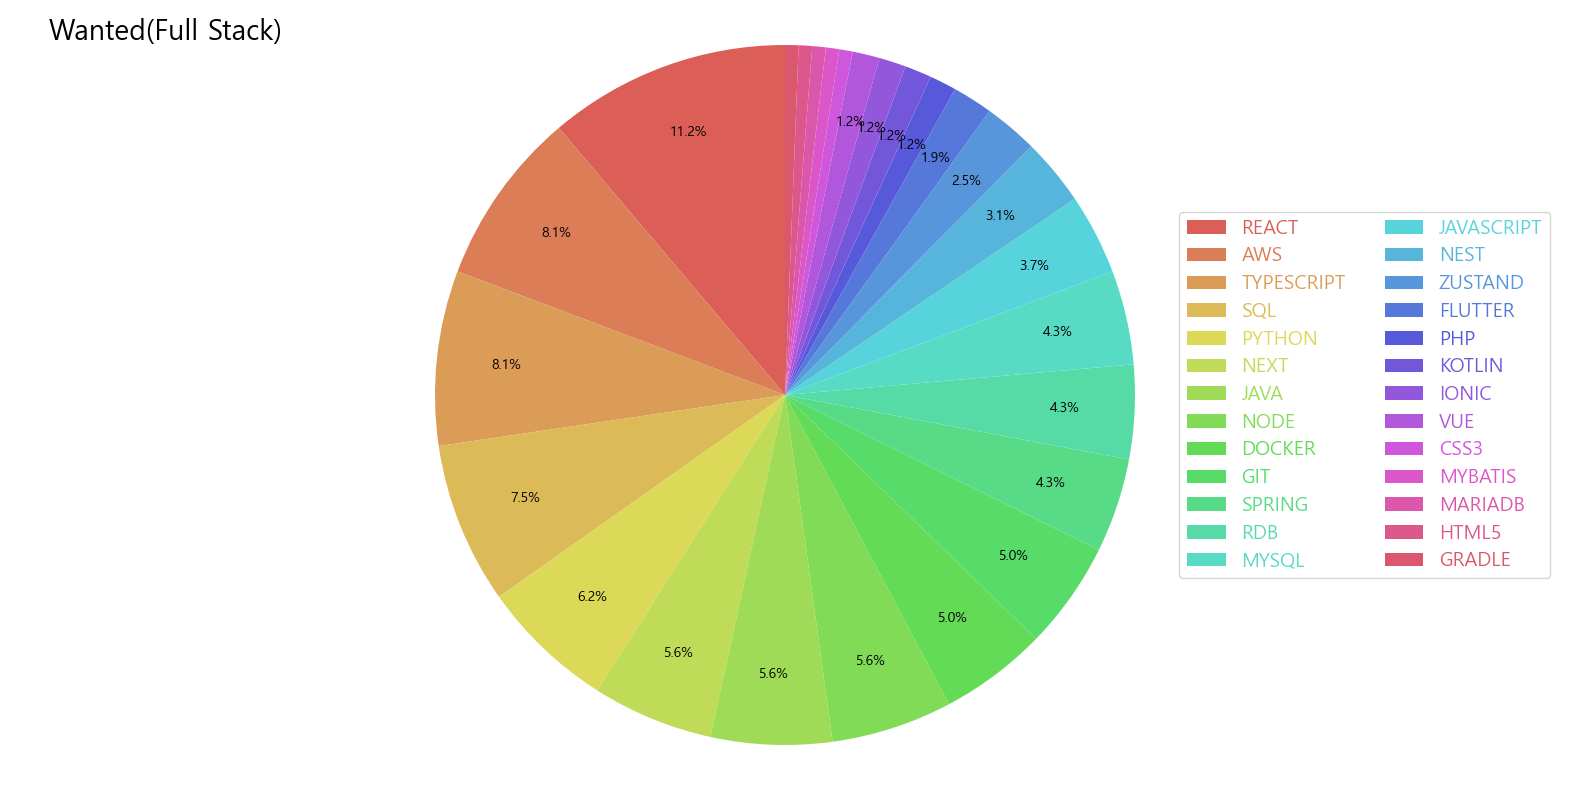

In [ ]:
draw_circle(df_wanted_cnt, 'Wanted')
draw_circle(df_wanted_back_cnt, 'Wanted(Back-End)')
draw_circle(df_wanted_front_cnt, 'Wanted(Front-End)')
draw_circle(df_wanted_full_cnt, 'Wanted(Full Stack)')